**NOTEBOOK FOR ANALYSIS**

In [55]:
import pandas as pd
import numpy as np
import warnings
import rich
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('2023-2024/best5leagues_datasetplayers.csv')

In [56]:
df.keys()

Index(['Player', 'Nation', 'Squad', 'Age', 'Born', '90s', 'SCA SCA',
       'SCA SCA90', 'SCA Types PassLive', 'SCA Types PassDead', 'SCA Types TO',
       'SCA Types Sh', 'SCA Types Fld', 'SCA Types Def', 'GCA GCA',
       'GCA GCA90', 'GCA Types PassLive', 'GCA Types PassDead', 'GCA Types TO',
       'GCA Types Sh', 'GCA Types Fld', 'GCA Types Def', 'Position_2',
       'Position', 'League'],
      dtype='object')

In [57]:
#Isolate for players who played at least 12 matches

df['90s'] = pd.to_numeric(df['90s'], errors='coerce')
matches = 12.0
filtered_df = df[df['90s'] >= matches] 

In [58]:
top_players = {}

# List of statistics columns to evaluate
stats_columns = ['SCA SCA90', 'GCA GCA90', 'SCA Types PassLive', 'GCA Types PassLive', 'GCA Types Def']

for col in stats_columns:
    filtered_df[col] = pd.to_numeric(filtered_df[col], errors='coerce')

for stat in stats_columns:
    top_players[stat] = filtered_df.nlargest(5, stat)[['Player', stat]]


In [59]:
for stat, players in top_players.items():
    rich.print(f"Top 5 players for {stat}:")
    rich.print(players)
    print("\n")

Top 5 players for SCA SCA90:

Player  SCA SCA90
2611     Kevin Stöger       7.79
681   Kevin De Bruyne       7.36
697   Ousmane Dembélé       7.05
1613   James Maddison       6.79
1192    Jonas Hofmann       6.42

Top 5 players for GCA GCA90:

Player  GCA GCA90
681   Kevin De Bruyne       1.18
697   Ousmane Dembélé       1.14
1302       Diogo Jota       1.10
734       Brahim Díaz       1.05
2042    Michael Olise       0.99

Top 5 players for SCA Types PassLive:

Player  SCA Types PassLive
2962  Martin Ødegaard                 178
895   Bruno Fernandes                 143
2404      Bukayo Saka                 137
2611     Kevin Stöger                 131
2341            Rodri                 130

Top 5 players for GCA Types PassLive:

Player  GCA Types PassLive
2107      Cole Palmer                  20
2461            Sávio                  19
2887    Florian Wirtz                  18
2962  Martin Ødegaard                  18
1506      Rafael Leão                  17

Top 5 players for GCA Types Def:

Player  GCA Types Def
1707   Lautaro Martínez              3
57    Maghnes Akliouche              2
121              Antony              2
850   Youssef En-Nesyri              2
991        James Garner              2

**Aggregated Analysis for top 5 Championships**

In [60]:
df = pd.read_csv("2023-2024/combined_players_stats.csv")

df.head()

,Player,Nation,Pos,Age,Playing Time MP,Playing Time Starts,Playing Time Min,Playing Time 90s,Performance Gls,Performance Ast,...,Per 90 Minutes G+A-PK,Per 90 Minutes xG,Per 90 Minutes xAG,Per 90 Minutes xG+xAG,Per 90 Minutes npxG,Per 90 Minutes npxG+xAG,Matches,League,Team,MP
0,William Saliba,fr FRA,DF,22.0,38.0,38,3420.0,38.0,2.0,1.0,...,0.08,0.04,0.01,0.05,0.04,0.05,Matches,EPL,Arsenal,NaN
1,Declan Rice,eng ENG,MF,24.0,38.0,37,3225.0,35.8,7.0,8.0,...,0.42,0.09,0.15,0.24,0.09,0.24,Matches,EPL,Arsenal,NaN
2,Martin Ødegaard,no NOR,MF,24.0,35.0,35,3091.0,34.3,8.0,10.0,...,0.47,0.22,0.28,0.50,0.17,0.45,Matches,EPL,Arsenal,NaN
3,Ben White,eng ENG,DF,25.0,37.0,35,2988.0,33.2,4.0,4.0,...,0.24,0.03,0.11,0.15,0.03,0.15,Matches,EPL,Arsenal,NaN
4,Bukayo Saka,eng ENG,FW,21.0,35.0,35,2919.0,32.4,16.0,9.0,...,0.59,0.48,0.32,0.80,0.33,0.65,Matches,EPL,Arsenal,NaN


In [61]:
df.keys()

Index(['Player', 'Nation', 'Pos', 'Age', 'Playing Time MP',
       'Playing Time Starts', 'Playing Time Min', 'Playing Time 90s',
       'Performance Gls', 'Performance Ast', 'Performance G+A',
       'Performance G-PK', 'Performance PK', 'Performance PKatt',
       'Performance CrdY', 'Performance CrdR', 'Expected xG', 'Expected npxG',
       'Expected xAG', 'Expected npxG+xAG', 'Progression PrgC',
       'Progression PrgP', 'Progression PrgR', 'Per 90 Minutes Gls',
       'Per 90 Minutes Ast', 'Per 90 Minutes G+A', 'Per 90 Minutes G-PK',
       'Per 90 Minutes G+A-PK', 'Per 90 Minutes xG', 'Per 90 Minutes xAG',
       'Per 90 Minutes xG+xAG', 'Per 90 Minutes npxG',
       'Per 90 Minutes npxG+xAG', 'Matches', 'League', 'Team', 'MP'],
      dtype='object')

In [62]:
df['Playing Time 90s'] = pd.to_numeric(df['Playing Time 90s'], errors='coerce')
matches = 12.0
df = df[df['Playing Time 90s'] >= matches]

In [63]:
top_players = {}

# List of statistics columns to evaluate
stats_columns = ['Performance Gls', 'Expected xG', 'Per 90 Minutes Gls', 'Per 90 Minutes npxG+xAG', 'Progression PrgP']

for col in stats_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for stat in stats_columns:
    top_players[stat] = df.nlargest(5, stat)[['Player', stat]]

In [64]:
for stat, players in top_players.items():
    rich.print(f"Top 5 players for {stat}:")
    rich.print(players)
    print("\n")

Top 5 players for Performance Gls:

Player  Performance Gls
1636        Harry Kane             36.0
2029   Serhou Guirassy             28.0
452     Erling Haaland             27.0
2634     Kylian Mbappé             27.0
1106  Lautaro Martínez             24.0

Top 5 players for Expected xG:

Player  Expected xG
1636      Harry Kane         30.6
452   Erling Haaland         29.2
3119    Artem Dovbyk         24.2
1991     Loïs Openda         22.1
373    Mohamed Salah         21.2

Top 5 players for Per 90 Minutes Gls:

Player  Per 90 Minutes Gls
1636       Harry Kane                1.14
2029  Serhou Guirassy                1.14
2634    Kylian Mbappé                1.13
452    Erling Haaland                0.95
524    Alexander Isak                0.84

Top 5 players for Per 90 Minutes npxG+xAG:

Player  Per 90 Minutes npxG+xAG
1636       Harry Kane                     1.05
459   Kevin De Bruyne                     1.03
2029  Serhou Guirassy                     0.99
373     Mohamed Salah                     0.97
452    Erling Haaland                     0.96

Top 5 players for Progression PrgP:

Player  Progression PrgP
1608         Granit Xhaka             392.0
446                 Rodri             376.0
2         Martin Ødegaard             344.0
1328  Giovanni Di Lorenzo             304.0
147           Pascal Groß             302.0

In [65]:
def analize(path_file: str, variables: list, matches_played: float, top_n_players: int):
    """
    Analyzes player statistics from a specific league and compares them to the top players across Europe.

    Parameters:
    - path_file (str): Path to the CSV file containing player statistics for the specific league.
    - variables (list): List of statistical variables to analyze (e.g., ['Goals', 'Assists', 'Shots']).
    - matches_played (float): Minimum number of matches played (in 90-minute equivalents) to consider a player.
    - top_n_players (int): Number of top players to return for each statistical variable.

    Returns:
    - tuple: A tuple containing:
        - str: A title for the best players of the league.
        - dict: A dictionary where keys are the statistical variables and values are DataFrames of the top players 
                in the league for each variable.
        - str: A title for the best players in Europe.
        - dict: A dictionary where keys are the statistical variables and values are DataFrames of the top players 
                across Europe for each variable.
    """
    df = pd.read_csv(path_file)
    df['Playing Time 90s'] = pd.to_numeric(df['Playing Time 90s'], errors='coerce')
    df = df[df['Playing Time 90s'] >= matches_played]

    df_top_players = pd.read_csv("2023-2024/combined_players_stats.csv")
    df_top_players['Playing Time 90s'] = pd.to_numeric(df_top_players['Playing Time 90s'], errors='coerce')
    df_top_players = df_top_players[df_top_players['Playing Time 90s'] >= matches_played]
    
    top_players = {}
    top_players_5_leagues = {}

    for col in variables:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df_top_players[col] = pd.to_numeric(df_top_players[col], errors='coerce')
    
    for stat in variables:
        top_players[stat] = df.nlargest(5, stat)[['Player', stat]]
        top_players_5_leagues[stat] = df_top_players.nlargest(top_n_players, stat)[['Player', stat]]

    return "Best players of the league", top_players, "Best players in Europe", top_players_5_leagues

In [66]:
stats_columns = ['Performance Gls', 'Expected xG', 'Per 90 Minutes Gls', 'Per 90 Minutes npxG+xAG', 'Progression PrgP']

rich.print(analize("2023-2024/Eredivise/combined_players_stats_Eredivise.csv",stats_columns, 12, 5 ))

(
    'Best players of the league',
    {
        'Performance Gls':                 Player  Performance Gls
78   Vangelis Pavlidis             29.0
350       Luuk de Jong             29.0
156   Santiago Giménez             23.0
2        Brian Brobbey             18.0
452         Sem Steijn             17.0,
        'Expected xG':                 Player  Expected xG
350       Luuk de Jong         27.8
78   Vangelis Pavlidis         23.8
156   Santiago Giménez         22.8
2        Brian Brobbey         19.8
413   Tobias Lauritsen         12.9,
        'Per 90 Minutes Gls':                     Player  Per 90 Minutes Gls
350           Luuk de Jong                0.95
78       Vangelis Pavlidis                0.87
156       Santiago Giménez                0.87
460  Ricky van Wolfswinkel                0.76
293          Jizz Hornkamp                0.70,
        'Per 90 Minutes npxG+xAG':                 Player  Per 90 Minutes npxG+xAG
350       Luuk de Jong                     1.02
2        Brian Brobbey                     0.95
156   Santiago Giménez                     0.93
78   Vangelis Pavlidis                     0.88
162     Yankuba Minteh                     0.87,
        'Progression PrgP':                    Player  Progression PrgP
352      Olivier Boscagli             374.0
357          Joey Veerman             314.0
153          Dávid Hancko             272.0
152  Lutsharel Geertruida             268.0
256             Thom Haye             241.0
    },
    'Best players in Europe',
    {
        'Performance Gls':                 Player  Performance Gls
1636        Harry Kane             36.0
2029   Serhou Guirassy             28.0
452     Erling Haaland             27.0
2634     Kylian Mbappé             27.0
1106  Lautaro Martínez             24.0,
        'Expected xG':               Player  Expected xG
1636      Harry Kane         30.6
452   Erling Haaland         29.2
3119    Artem Dovbyk         24.2
1991     Loïs Openda         22.1
373    Mohamed Salah         21.2,
        'Per 90 Minutes Gls':                Player  Per 90 Minutes Gls
1636       Harry Kane                1.14
2029  Serhou Guirassy                1.14
2634    Kylian Mbappé                1.13
452    Erling Haaland                0.95
524    Alexander Isak                0.84,
        'Per 90 Minutes npxG+xAG':                Player  Per 90 Minutes npxG+xAG
1636       Harry Kane                     1.05
459   Kevin De Bruyne                     1.03
2029  Serhou Guirassy                     0.99
373     Mohamed Salah                     0.97
452    Erling Haaland                     0.96,
        'Progression PrgP':                    Player  Progression PrgP
1608         Granit Xhaka             392.0
446                 Rodri             376.0
2         Martin Ødegaard             344.0
1328  Giovanni Di Lorenzo             304.0
147           Pascal Groß             302.0
    }
)

In [67]:
team_comparison = df.groupby('Team').agg({
    'Performance Gls': 'sum',
    'Performance Ast': 'sum',
    'Per 90 Minutes xG': 'mean',
    'Per 90 Minutes xAG': 'mean'
}).reset_index().sort_values(by='Performance Gls', ascending=False)

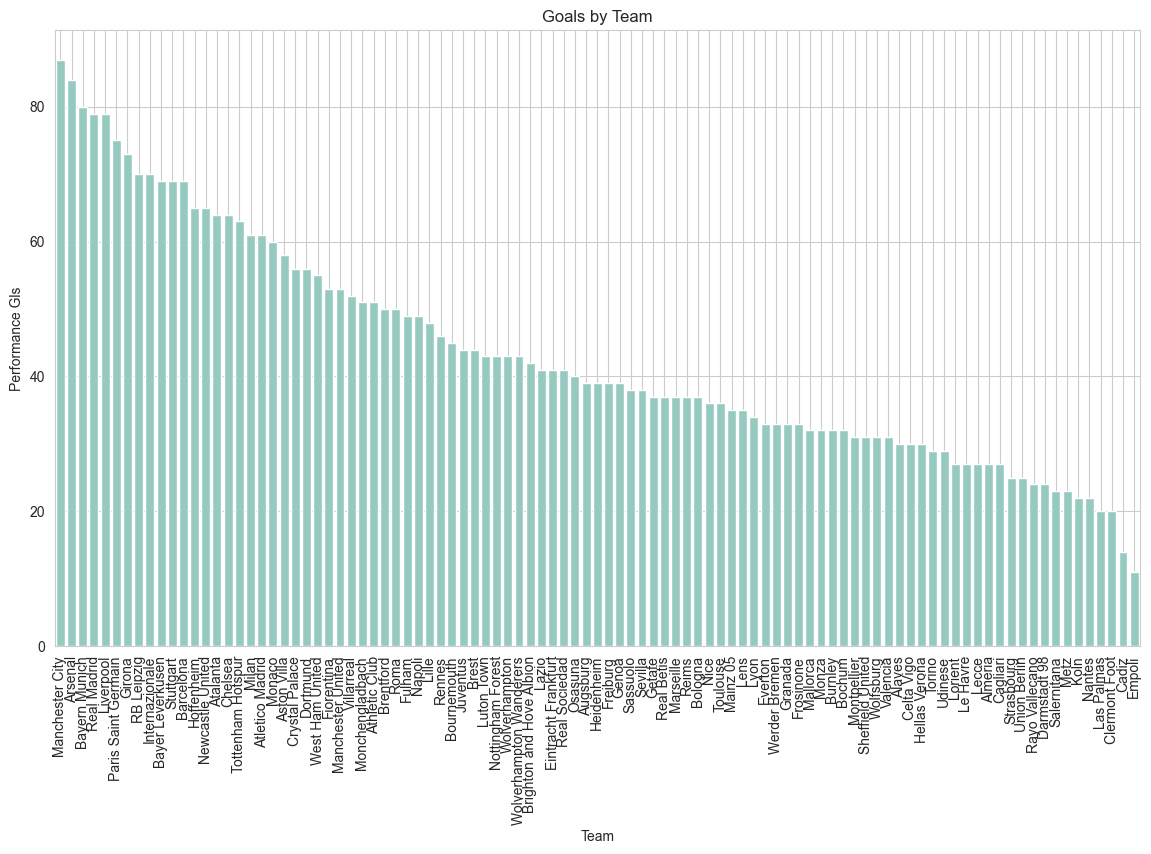

In [68]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Team', y='Performance Gls', data=team_comparison)
plt.title('Goals by Team')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [69]:
league_comparison = df.groupby('League').agg({
    'Performance Gls': 'sum',
    'Performance Ast': 'sum',
    'Per 90 Minutes xG': 'mean',
    'Per 90 Minutes xAG': 'mean'
}).reset_index().sort_values(by='Performance Gls', ascending=False)

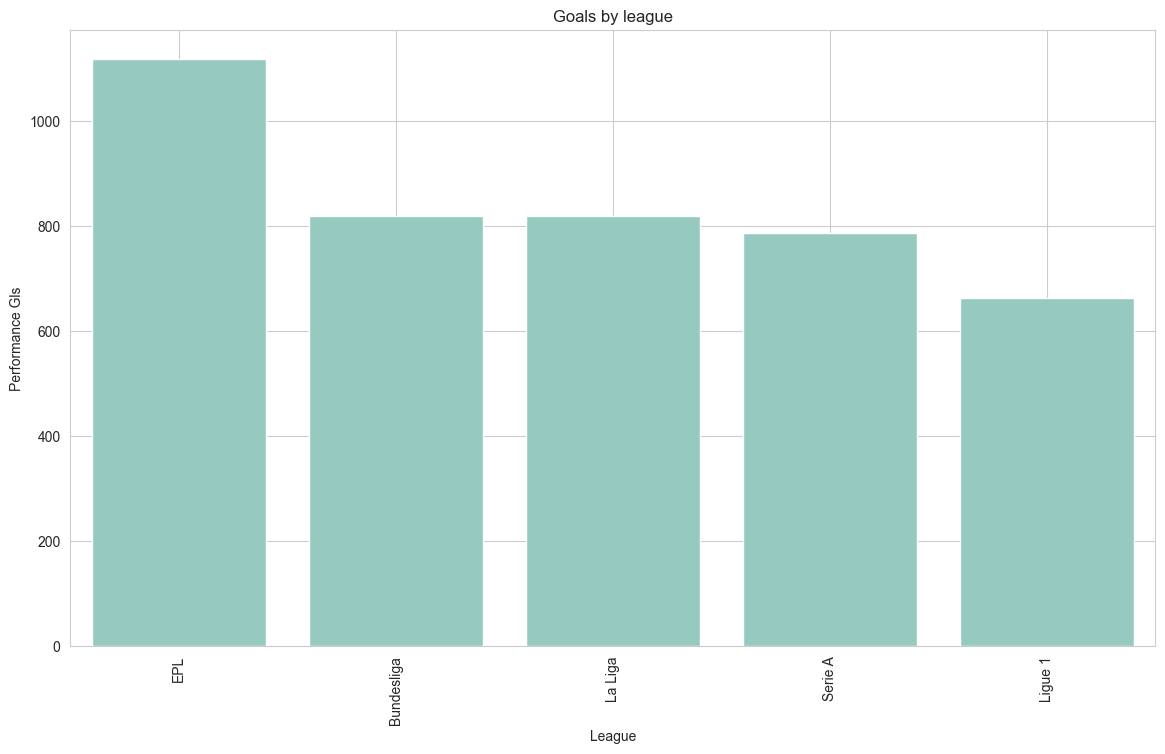

In [70]:
plt.figure(figsize=(14, 8))
sns.barplot(x='League', y='Performance Gls', data=league_comparison)
plt.title('Goals by league')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

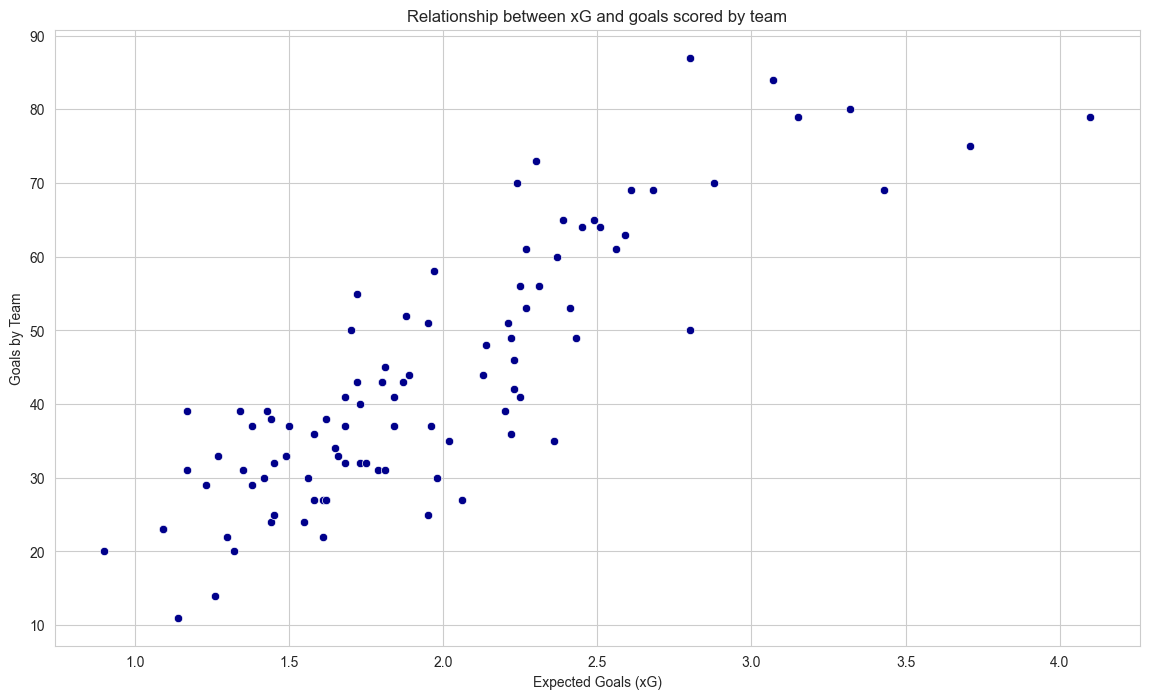

In [71]:
team_xg_vs_goals = df.groupby('Team').agg({
    'Performance Gls': 'sum',
    'Per 90 Minutes xG': 'sum'
}).reset_index()


plt.figure(figsize=(14, 8))
sns.scatterplot(x='Per 90 Minutes xG', y='Performance Gls', data=team_xg_vs_goals, color='darkblue')
plt.title('Relationship between xG and goals scored by team')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Goals by Team')
plt.grid(True)
plt.show()

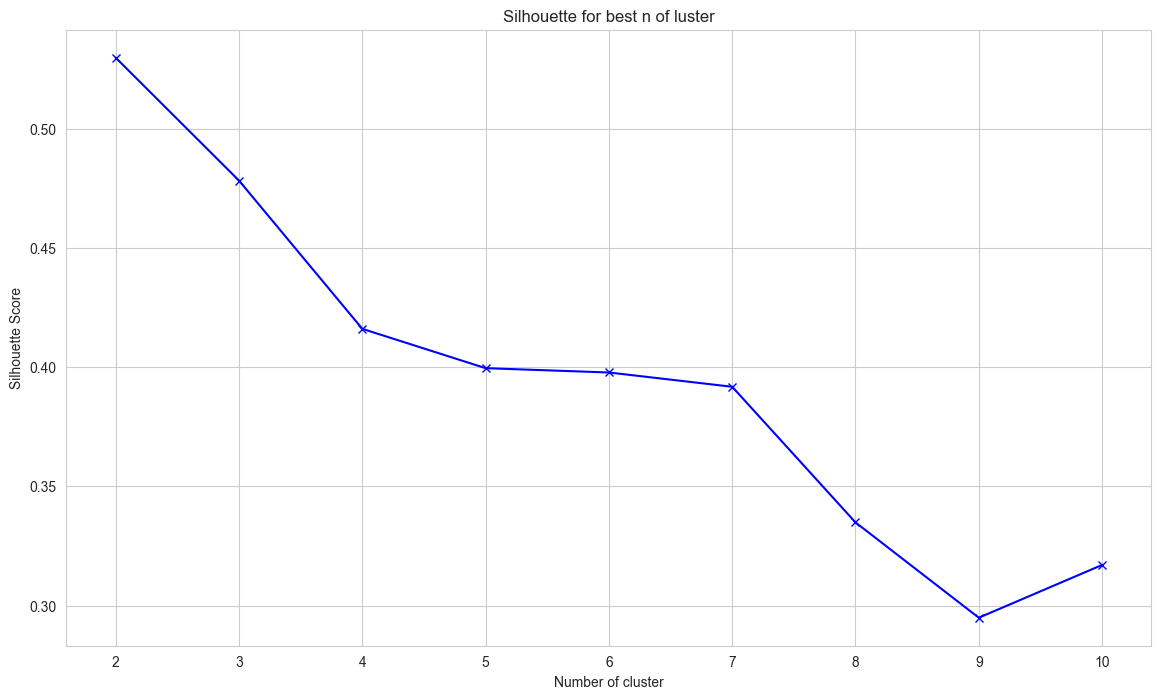

Numero ottimale di cluster: 2


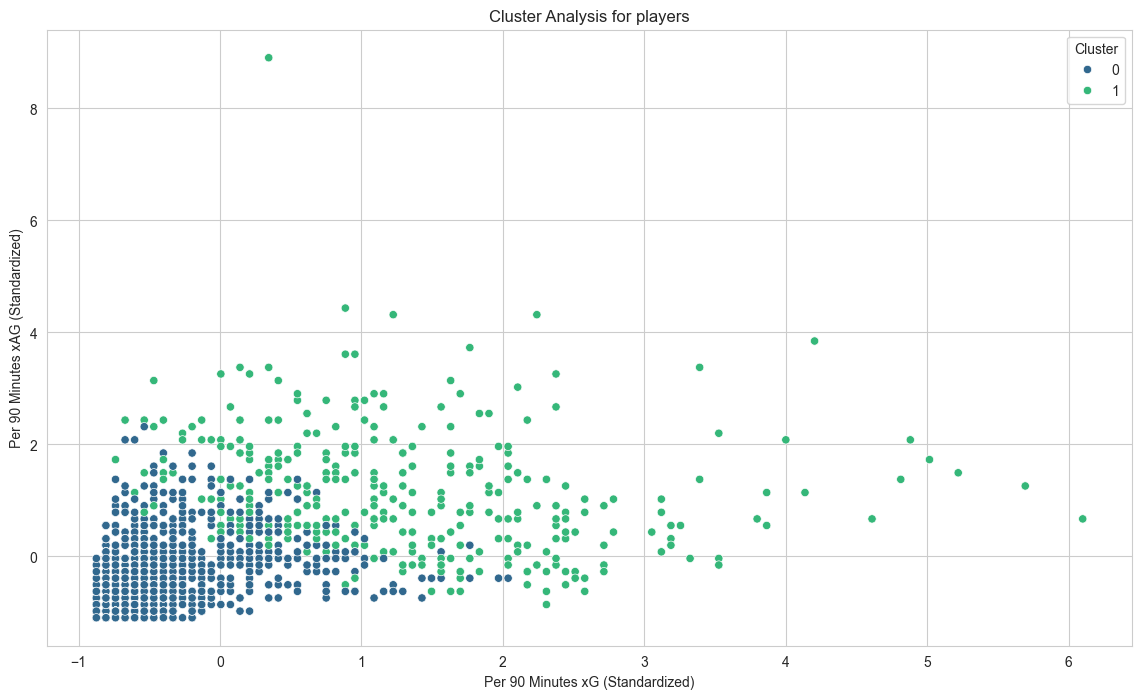

In [73]:
features = df[['Per 90 Minutes xG', 'Per 90 Minutes xAG', 'Performance Gls', 'Performance Ast']]
features = features.dropna()  

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

silhouette_scores = {}
K = range(2, 11)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores[k] = score

plt.style.use('dark_background')
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), 'bx-')
plt.xlabel('Number of cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette for best n of luster')
plt.grid(True)
plt.show()


k_optimal = max(silhouette_scores, key=silhouette_scores.get)
print(f'Numero ottimale di cluster: {k_optimal}')
kmeans = KMeans(n_clusters=k_optimal, random_state=30)
df['Cluster'] = kmeans.fit_predict(scaled_features)


plt.figure(figsize=(14, 8))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Cluster Analysis for players')
plt.xlabel('Per 90 Minutes xG (Standardized)')
plt.ylabel('Per 90 Minutes xAG (Standardized)')
plt.grid(True)
plt.show()


In [75]:
cluster_composition = df['Cluster'].value_counts().sort_index()
rich.print("Cluster composition:")
rich.print(cluster_composition)


cluster_stats = df.groupby('Cluster').agg({
    'Per 90 Minutes xG': ['mean', 'std'],
    'Per 90 Minutes xAG': ['mean', 'std'],
    'Performance Gls': ['mean', 'std'],
    'Performance Ast': ['mean', 'std']
}).reset_index()

rich.print("Stas by cluster:")
rich.print(cluster_stats)

Cluster composition:

Cluster
0    1119
1     347
Name: count, dtype: int64

Stas by cluster:

Cluster Per 90 Minutes xG           Per 90 Minutes xAG            \
                       mean       std               mean       std   
0       0          0.070009  0.069941           0.062109  0.053150   
1       1          0.319914  0.169715           0.192363  0.092284   

  Performance Gls           Performance Ast            
             mean       std            mean       std  
0        1.294906  1.544996        1.191242  1.345859  
1        7.948127  5.199785        4.876081  2.755799

In [76]:
top_players_per_cluster = df.groupby('Cluster').apply(lambda x: x.nlargest(5, 'Performance Gls')).reset_index(drop=True)

rich.print("Best 5 players by goals for each cluster:")
rich.print(top_players_per_cluster[['Player', 'Team', 'Cluster', 'Performance Gls']])


Best 5 players by goals for each cluster:

Player                 Team  Cluster  Performance Gls
0  Callum Hudson-Odoi    Nottingham Forest        0              8.0
1          Tim Skarke         Darmstadt 98        0              8.0
2     Odsonne Édouard       Crystal Palace        0              7.0
3     Scott McTominay    Manchester United        0              7.0
4        Tomáš Souček      West Ham United        0              7.0
5          Harry Kane        Bayern Munich        1             36.0
6     Serhou Guirassy            Stuttgart        1             28.0
7      Erling Haaland      Manchester City        1             27.0
8       Kylian Mbappé  Paris Saint Germain        1             27.0
9    Lautaro Martínez       Internazionale        1             24.0